# Data cleaning and dataset creation

## Imports

In [232]:
# Internal functions
import clean
import tuning
import matplotlib.pyplot as plt
from split import cr_pmt_split

%matplotlib inline
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## Data imports and cleaning

First, load the data and remove extraneous variables. Then, collapse categories at the respondent-level. Finally, move to collapse categories. 

In [211]:
# Import data
cr_df = clean.load_data("train.csv")

In [212]:
# Adjust missing values
cr_df = clean.handle_missing(cr_df)

# Collapse individual-level categories
cr_df = clean.clean_educ_cats(cr_df)
cr_df = clean.clean_marital_cats(cr_df)
cr_df = clean.clean_hhh_rel_cats(cr_df)

# Collapse household-level response categories
cr_df = clean.clean_pared_material_cats(cr_df)
cr_df = clean.clean_piso_material_cats(cr_df)
cr_df = clean.clean_sanitario_cats(cr_df)
cr_df = clean.clean_tipovivi_cats(cr_df)

## 2 | Feature engineering

This section creates features used in the analysis.

In [213]:
# TODO: Need to write these
cr_df.head()

,Id,v2a1,hacdor,rooms,hacapo,v14a,refrig,v18q1,r4t3,escolari,...,"piso_material_mosaic, ceramic, terrazo",piso_material_other,piso_material_wood,rubbish_disposal_1 tanker truck,rubbish_disposal_3 burning,rubbish_disposal_6 other,tipovivi_fully paid,tipovivi_other,tipovivi_own,tipovivi_rented
0,ID_279628684,190000.0,0,3,0,1,1,0.0,1,10,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
1,ID_f29eb3ddd,135000.0,0,4,0,1,1,1.0,1,12,...,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
2,ID_68de51c94,0.0,0,8,0,1,1,0.0,1,11,...,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
3,ID_d671db89c,180000.0,0,5,0,1,1,1.0,4,9,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
4,ID_d56d6f5f5,180000.0,0,5,0,1,1,1.0,4,11,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0


## 3 | Train-test split

Collapse the dataset into the household-level and create training, validation, and test sets to train models.

In [214]:
# Collapse data to household-level 
cr_df = clean.collapse_df(cr_df)
cr_df = clean.drop_indiv_vars(cr_df)

In [215]:
# Conduct split
X_train, y_train, X_val, y_val, X_test, y_test = cr_pmt_split(cr_df)

Training set prior to SMOTE: 2390
Training set size after SMOTE: 5463
Validation set size after SMOTE: 781
Test set size: 598


In [216]:
# Conduct split for CV
X_train, y_train, X_test, y_test = cr_pmt_split(cr_df, cv = True)

Training set size prior to SMOTE (prior to CV): 2390
Training set size after SMOTE (prior to CV): 6244
Test set size 598


## 4 | Model tuning

We tune 3 sets of models and store the various results in a list.

In [256]:
# Tune 3 sets of models
rf = tuning.tune_sklearn_models(X_train, y_train, 'RandomForestClassifier')
rf_model = rf[3].fit(X_train, y_train)

In [240]:
lm = tuning.tune_sklearn_models(X_train, y_train, 'LogisticRegression')
lm_model = lm[3].fit(X_train, y_train)

c:\Users\micha\AppData\Local\pypoetry\Cache\virtualenvs\costa_rica_proxy_means_test-oy7JmmkA-py3.12\Lib\site-packages\sklearn\svm\_base.py:1237: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
c:\Users\micha\AppData\Local\pypoetry\Cache\virtualenvs\costa_rica_proxy_means_test-oy7JmmkA-py3.12\Lib\site-packages\sklearn\svm\_base.py:1237: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
c:\Users\micha\AppData\Local\pypoetry\Cache\virtualenvs\costa_rica_proxy_means_test-oy7JmmkA-py3.12\Lib\site-packages\sklearn\svm\_base.py:1237: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


In [244]:
knn = tuning.tune_sklearn_models(X_train, y_train, 'KNeighborsClassifier')
knn_model = knn[3].fit(X_train, y_train)

In [226]:
# Storing MR trained CV values and then the best parameters as comments
tuning.create_estimate_table(rf, 'Random Forest', '../report/rf.csv')
tuning.create_estimate_table(lm, 'Logit', '../report/lm.csv')
tuning.create_estimate_table(lm, 'Logit', '../report/knn.csv')
print(rf[0][rf[2]]) # {'criterion': 'gini', 'max_depth': 40, 'max_samples': 0.75, 'min_samples_leaf': 1, 'n_estimators': 100} 
print(lm[0][lm[2]]) # {'C': 100, 'penalty': 'l1'}
print(knn[0][knn[2]]) # {'leaf_size': 3, 'weights': distance} MR is skeptical this isn't overfit

{'criterion': 'gini', 'max_depth': 40, 'max_samples': 0.75, 'min_samples_leaf': 1, 'n_estimators': 100}
{'C': 100, 'penalty': 'l1'}
{'n_neighbors': 3, 'weights': 'distance'}


Accuracy: 0.6588628762541806
F1 Score (macro): 0.3434659527519699


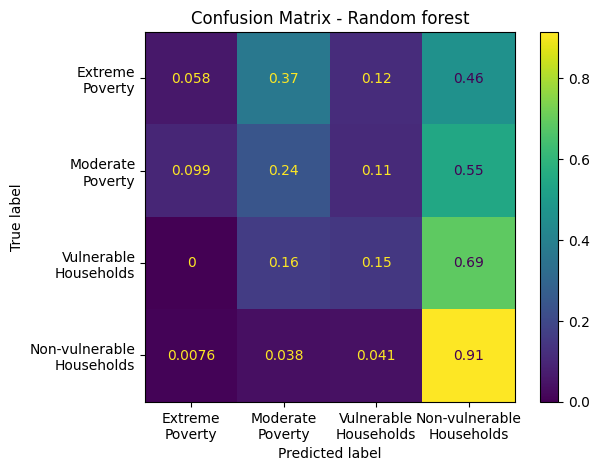

Accuracy: 0.6705685618729097
F1 Score (macro): 0.337002998048074


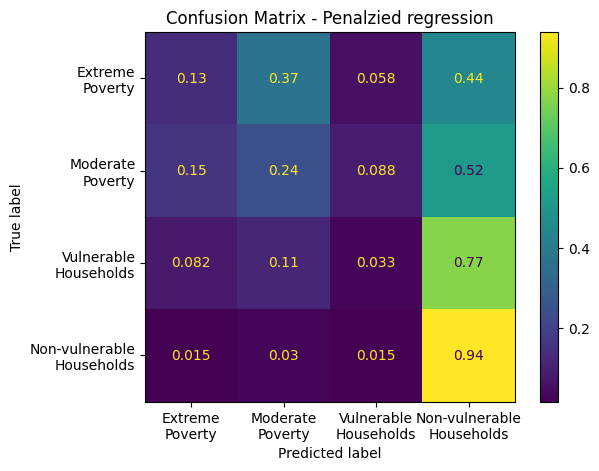

Accuracy: 0.4983277591973244
F1 Score (macro): 0.3679465187165644


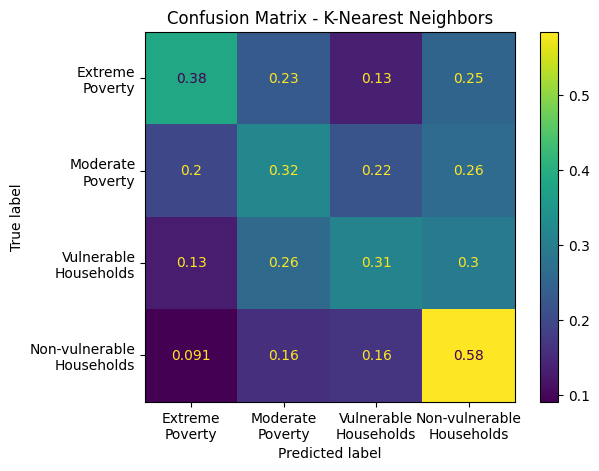

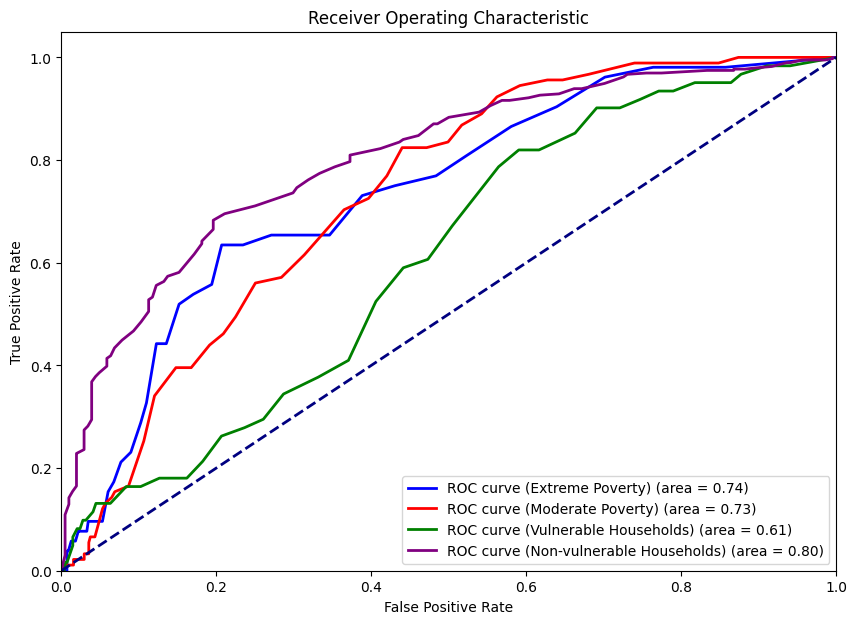

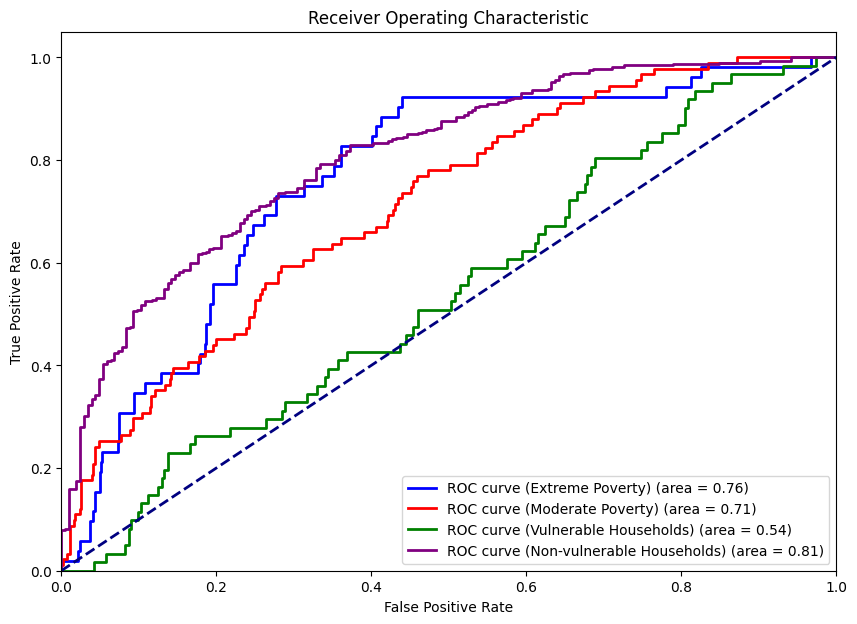

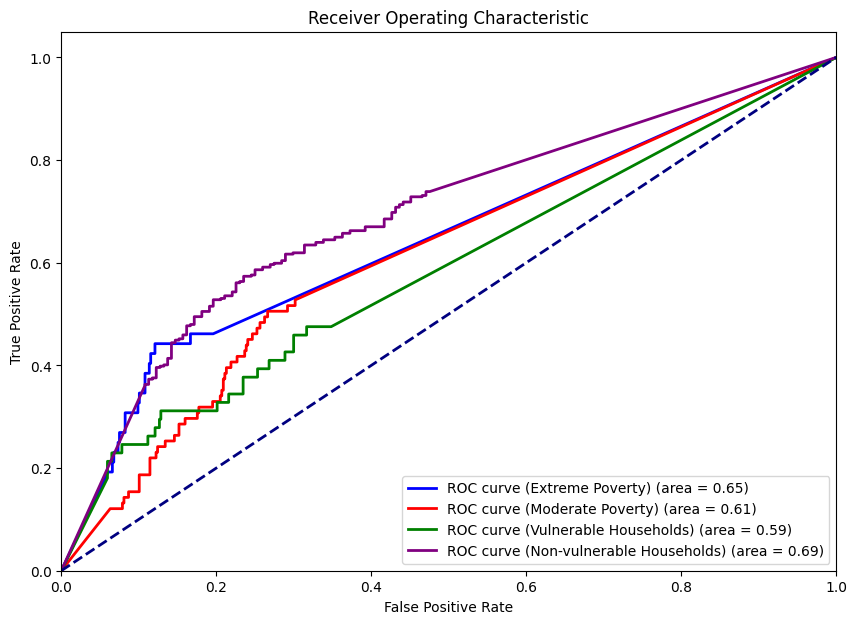

In [266]:
#Confusion matrix for Random Forest
tuning.visualize_acc(rf_model, "Random forest", X_test, y_test)
tuning.visualize_acc(lm_model, "Penalzied regression", X_test, y_test)
tuning.visualize_acc(knn_model, "K-Nearest Neighbors", X_test, y_test)

tuning.plot_roc_auc(rf_model, X_test, y_test)
tuning.plot_roc_auc(lm_model, X_test, y_test)
tuning.plot_roc_auc(knn_model, X_test, y_test)